# 1. Phương pháp Naive Bayes cho dữ liệu rời rạc 

## Ví dụ 1. Phân loại văn bản  

Phát biểu bài toán:  
Input là 1 đoạn văn bản  
Output là phân loại đoạn văn bản input thuộc lớp Bắc (B) hay Nam (N)  

Thông tin data:  
Training set có {D1, D2, D3, D4} với mỗi bản ghi là (string nội dung, nhãn lớp (B/N))  
Test set có {D5, D6}  

Hướng giải:  
Nhận xét output là rời rạc (2 lớp) có dạng nhị phân (or B or N)  
-> có 2 cách giải quyết: Multinomial Naive Bayes or Bernoulli Naive Bayes  

### Code triển khai theo phương pháp Multinomial Naive Bayes 

In [18]:
# import necessary module 
from sklearn.naive_bayes import MultinomialNB 
import numpy as np 

In [19]:
# train data 
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0] 
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0] 
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0] 
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1] 

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N'])

In [20]:
# test data 
d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]]) 
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]]) 

In [21]:
# call MultinomialNB 
clf = MultinomialNB() 

# training 
clf.fit(train_data, label) 

# test 
print('Predicting class of d5:', str(clf.predict(d5)[0])) 
print('Predicting class of d6:', str(clf.predict(d6)[0])) 
print('Probability of d5 in each class:', clf.predict_proba(d5)) 
print('Probability of d6 in each class:', clf.predict_proba(d6)) 

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.89548823 0.10451177]]
Probability of d6 in each class: [[0.29175335 0.70824665]]


### Code triển khai theo phương pháp Bernoulli Naive Bayes 

In [22]:
# import necessary modules
from sklearn.naive_bayes import BernoulliNB 
import numpy as np 

In [23]:
# train data 
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0] 
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0] 
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0] 
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1] 

train_data = np.array([d1, d2, d3, d4]) 
label = np.array(['B', 'B', 'B', 'N']) # 0 - B, 1 - N 

In [24]:
# test data 
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]]) 
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]]) 

In [25]:
# call MultinomialNB 
clf = BernoulliNB() 

# training 
clf.fit(train_data, label) 

# test 
print('Predicting class of d5:', str(clf.predict(d5)[0])) 
print('Predicting class of d6:', str(clf.predict(d6)[0])) 
print('Probability of d5 in each class:', clf.predict_proba(d5)) 
print('Probability of d6 in each class:', clf.predict_proba(d6)) 

Predicting class of d5: B
Predicting class of d6: N
Probability of d5 in each class: [[0.76554295 0.23445705]]
Probability of d6 in each class: [[0.16948581 0.83051419]]


## Ví dụ 2. Phân loại email spam or not spam bằng Naive Bayes 

Phát biểu bài toán:  
Input là 1 email  
Output là nhãn Spam or Not spam  

Thông tin data:  
Dữ liệu là tập con của bộ dữ liệu có tại link: https://metatext.io/datasets/ling-spam-dataset  

Tập dữ liệu  này  bao  gồm  tổng  cộng  960  emails  tiếng Anh, được  tách  thành  tập  training  và  test  theo  tỉ  lệ 700:260, 50% trong mỗi tập là các spam emails.  

Bộ dữ liệu đã được tiền xử lý theo các bước:  
    +   Loại  bỏ  stop  words:  Những  từ  xuất  hiện thường xuyên như ‘and’, ‘the’, ‘of’, ... được loại bỏ.  
    +   Lemmatization: Những từ có cùng ‘gốc’ được đưa về cùng loại. Ví dụ, ‘include’, ‘includes’, ‘included’ đều được đưa chung về ‘include’. Tất cả các từ cũng đã được đưa về dạng ký tự thường (không phải HOA).  
    +   Loại bỏ non-words: Số, dấu câu, ký tự ‘tabs’, ký tự ‘xuống dòng’ đã được loại bỏ.  

Bộ dữ liệu sau xử lý có trong link sau:  
http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex6materials/ex6DataPrepared.zip 

In [26]:
# packages  
from __future__ import division, print_function, unicode_literals 
import numpy as np 
from scipy.sparse import coo_matrix         # for sparse matrix 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score  # for evaluating results 

# data path and file name  
path = 'data/email/' 
train_data_fn = 'train-features.txt' 
test_data_fn = 'test-features.txt' 
train_label_fn = 'train-labels.txt' 
test_label_fn = 'test-labels.txt' 

In [27]:
# data processing 

nwords = 2500  
 
def read_data(data_fn, label_fn): 
    ## read label_fn 
    with open(path + label_fn) as f: 
        content = f.readlines() 
    label = [int(x.strip()) for x in content] 
 
    ## read data_fn 
    with open(path + data_fn) as f: 
        content = f.readlines() 
    # remove '\n' at the end of each line 
    content = [x.strip() for x in content]  
 
    dat = np.zeros((len(content), 3), dtype = int) 
     
    for i, line in enumerate(content):  
        a = line.split(' ') 
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])]) 
     
    # remember to -1 at coordinate since we're in Python 
    # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coomatrix.html 
    # for more information about coo_matrix function  
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)), 
                      shape=(len(label), nwords)) 
    return (data, label)

In [28]:
# read data 
(train_data, train_label)  = read_data(train_data_fn, train_label_fn) 
(test_data, test_label)  = read_data(test_data_fn, test_label_fn) 

# use multinomial naive bayes 
clf = MultinomialNB() 
clf.fit(train_data, train_label) 
y_pred = clf.predict(test_data)

# print result test: only first email in test set 
print('Predicting class of first test:', str(y_pred[0]))  
print('Probability of first test in each class:', clf.predict_proba(test_data.getrow(0))) 

Predicting class of first test: 0
Probability of first test in each class: [[1.00000000e+00 6.89888446e-34]]


In [29]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


# 2. Phương pháp Gaussian Naive Bayes cho dữ liệu liên tục 

## Ví dụ 3. Phân loại bộ dữ liệu hoa IRIS 

+ Dữ liệu gồm 150 dòng (ứng với 150 mẫu), chia đều cho 03 loại hoa trên. Chúng ta lấy ngẫu nhiên mỗi loại hoa 40 mẫu dữ liệu dùng làm training data, phần còn lại dùng làm testing data.  
+ Do dữ liệu vào là số thực, vì vậy chúng ta sẽ phải dùng phương pháp Gaussian Naïve Bayes.  
+ Để đơn giản trước hết ta chỉ căn cứ vào độ dài cánh hoa để phân loại. Các bước tính toán theo lý thuyết (sử dụng phương pháp ước lượng hợp lý cực đại – MLE)  

### Cách 1. Sử dụng Numpy & Pandas  

In [1]:
# import modules 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import matplotlib.colors as colors 
import seaborn as sns 
import itertools 
from scipy.stats import norm 
import scipy.stats 
from sklearn.naive_bayes import GaussianNB 
 
%matplotlib inline 
sns.set()

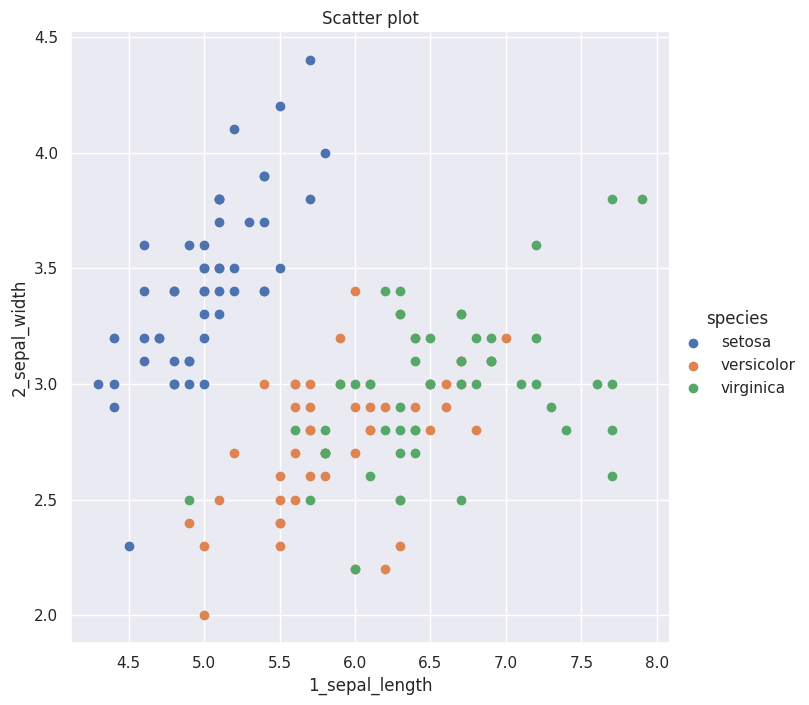

In [2]:
# load the data set 
iris = sns.load_dataset("iris") 
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'}) 
 
# plot the scatter of sepal length vs sepal width 
sns.FacetGrid(iris, hue="species", height=7).map(plt.scatter,"1_sepal_length", "2_sepal_width", ).add_legend() 
plt.title('Scatter plot') 
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [32]:
# Xử lý bài toán bằng phương pháp Gaussian Naïve Bayes dùng thư viện Numpy và Pandas
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list):  
    # Returns the class for which the Gaussian Naive Bayes objective function has greatest value 
    scores_list = [] 
    classes = len(mu_list) 
     
    for p in range(classes): 
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0])   
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1])  
                * pi_list[p]) 
        scores_list.append(score) 
              
    return np.argmax(scores_list) 
 
def predict_Bayes_class(X,mu_list,sigma_list):  
    # Returns the predicted class from an optimal bayes classifier - distributions must be known 
    scores_list = [] 
    classes = len(mu_list) 
     
    for p in range(classes): 
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p]) 
        scores_list.append(score) 
              
    return np.argmax(scores_list)

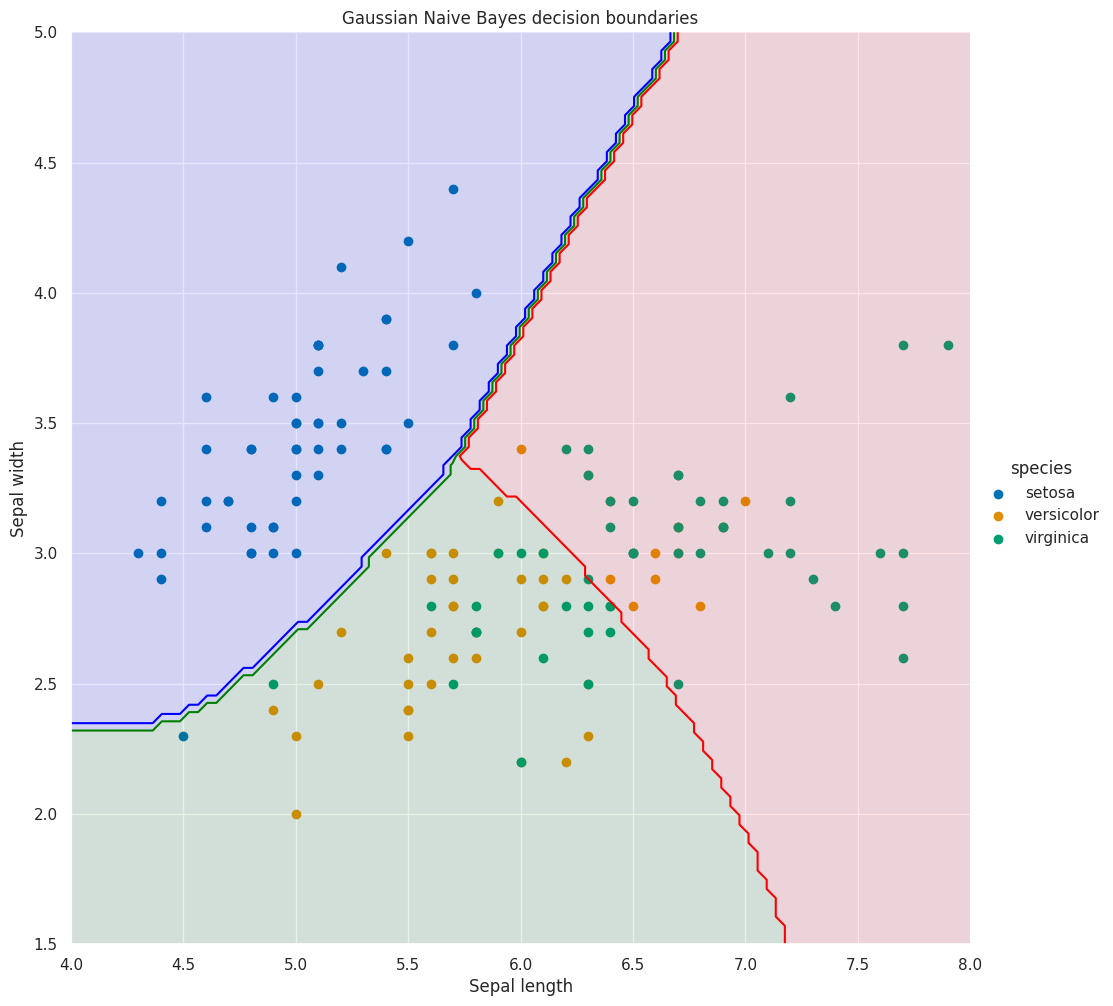

In [33]:
# Estimating the parameters 
mu_list = np.split(df1.groupby('species').mean().values,[1,2]) 
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0) 
pi_list = df1.iloc[:,2].value_counts().values / len(df1) 
 
# Our 2-dimensional distribution will be over variables X and Y 
N = 100 
X = np.linspace(4, 8, N) 
Y = np.linspace(1.5, 5, N) 
X, Y = np.meshgrid(X, Y) 
 
# fig = plt.figure(figsize = (10,10)) 
# ax = fig.gca() 
color_list = ['Blues','Greens','Reds'] 
my_norm = colors.Normalize(vmin=-1.,vmax=1.) 
 
g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",).add_legend() 
my_ax = g.ax 
 
# Computing the predicted class function for each value on the grid 
zz = np.array([predict_NB_gaussian_class(np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) for xx, yy in zip(np.ravel(X), np.ravel(Y))]) 
 
 
# Reshaping the predicted class into the meshgrid shape 
Z = zz.reshape(X.shape) 
 
# Plot the filled and boundary contours 
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red')) 
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red')) 
 
# Add axis and title 
my_ax.set_xlabel('Sepal length') 
my_ax.set_ylabel('Sepal width') 
my_ax.set_title('Gaussian Naive Bayes decision boundaries') 
 
plt.show()

### Cách 2. Sử dụng scikit-learning 

/home/harito/venv/py/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/harito/venv/py/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/harito/venv/py/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/harito/venv/py/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/harito/venv/py/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/home/harito/venv/py/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X

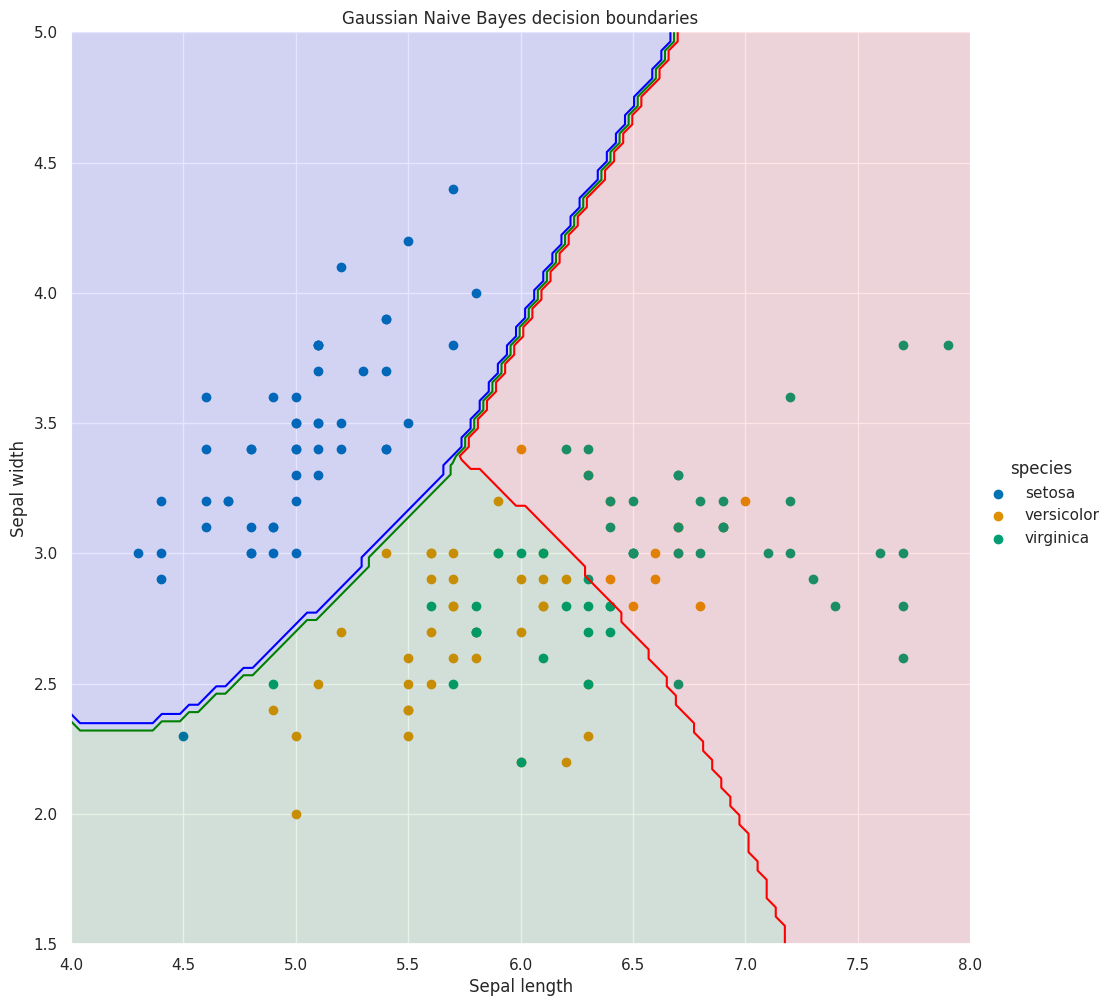

In [3]:
from sklearn.naive_bayes import GaussianNB 
 
# Setup X and y data 
X_data = df1.iloc[:,0:2] 
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy() 
 
# Fit model 
model_sk = GaussianNB(priors = None) 
model_sk.fit(X_data,y_labels) 
 
 
# Our 2-dimensional classifier will be over variables X and Y 
N = 100 
X = np.linspace(4, 8, N) 
Y = np.linspace(1.5, 5, N) 
X, Y = np.meshgrid(X, Y) 
 
# fig = plt.figure(figsize = (10,10)) 
# ax = fig.gca() 
color_list = ['Blues','Greens','Reds'] 
my_norm = colors.Normalize(vmin=-1.,vmax=1.) 
 
g = sns.FacetGrid(iris, hue="species", height=10, palette = 'colorblind').map(plt.scatter, "1_sepal_length", "2_sepal_width",).add_legend() 
my_ax = g.ax 
 
 
# Computing the predicted class function for each value on the grid 
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] ) 
 
 
# Reshaping the predicted class into the mesh grid shape 
Z = zz.reshape(X.shape) 
 
 
#Plot the filled and boundary contours 
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red')) 
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red')) 
 
# Add axis and title 
my_ax.set_xlabel('Sepal length') 
my_ax.set_ylabel('Sepal width') 
my_ax.set_title('Gaussian Naive Bayes decision boundaries') 
 
plt.show()

In [4]:
print(X_data)
print(y_labels)

     1_sepal_length  2_sepal_width
0               5.1            3.5
1               4.9            3.0
2               4.7            3.2
3               4.6            3.1
4               5.0            3.6
..              ...            ...
145             6.7            3.0
146             6.3            2.5
147             6.5            3.0
148             6.2            3.4
149             5.9            3.0

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64
